<a href="https://colab.research.google.com/github/Samm0707/ResearchCKD/blob/main/CKD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import drive


In [ ]:

import numpy as np
import tensorflow as tf
import random
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


df = pd.read_csv('/content/drive/MyDrive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')









Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')

# Using 'EventCKD35' as the target variable indicating the presence or absence of kidney disease
data = df.drop(columns='EventCKD35').values  # Dropping the target column from features
labels = df['EventCKD35'].values  # Using the target column for labels

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set number of epochs
epochs = 50

# Feedforward Model
feedforward_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
feedforward_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
feedforward_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
feedforward_accuracy = feedforward_model.evaluate(X_test, y_test)[1] * 100

# CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
cnn_accuracy = cnn_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# LSTM Model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
lstm_accuracy = lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# CNN-LSTM Model
cnn_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
cnn_lstm_accuracy = cnn_lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# Attention-LSTM Model
# Note: A simplified version of Attention
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def call(self, inputs):
        scores = tf.matmul(inputs, inputs, transpose_b=True)
        attention_weights = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(attention_weights, inputs)

attention_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Attention(),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
attention_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
attention_lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
attention_lstm_accuracy = attention_lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# Print accuracies in percentage
print("Feedforward Model Accuracy: {:.2f}%".format(feedforward_accuracy))
print("CNN Model Accuracy: {:.2f}%".format(cnn_accuracy))
print("LSTM Model Accuracy: {:.2f}%".format(lstm_accuracy))
print("CNN-LSTM Model Accuracy: {:.2f}%".format(cnn_lstm_accuracy))
print("Attention-LSTM Model Accuracy: {:.2f}%".format(attention_lstm_accuracy))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7904 - loss: 1.7046 - val_accuracy: 0.5190 - val_loss: 1.2708
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7642 - loss: 0.8633 - val_accuracy: 0.9367 - val_loss: 0.3451
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8748 - loss: 0.5491 - val_accuracy: 0.9367 - val_loss: 0.2898
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8943 - loss: 0.3305 - val_accuracy: 0.8987 - val_loss: 0.2901
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8742 - loss: 0.2723 - val_accuracy: 0.9494 - val_loss: 0.2153
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9050 - loss: 0.2367 - val_accuracy: 0.9494 - val_loss: 0.1928
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9141 - loss: 0.2236 - val_accuracy: 0.8987 - val_loss: 0.2120
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9283 - loss: 0.2033 - val_accuracy: 0.9367 - val_loss: 0.1817
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7553 - loss: 0.9196 - val_accuracy: 0.9367 - val_loss: 0.2130
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - loss: 0.3347 - val_accuracy: 0.8861 - val_loss: 0.2214
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9107 - loss: 0.2793 - val_accuracy: 0.8481 - val_loss: 0.3787
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8616 - loss: 0.3692 - val_accuracy: 0.8861 - val_loss: 0.1965
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8778 - loss: 0.3106 - val_accuracy: 0.8861 - val_loss: 0.1990
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8778 - loss: 0.3042 - val_accuracy: 0.9241 - val_loss: 0.1758
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.2903 - val_accuracy: 0.9367 - val_loss: 0.1663
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8790 - loss: 0.2756 - val_accuracy: 0.9367 - val_loss: 0.1634
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3716 - loss: 0.7712 - val_accuracy: 0.9367 - val_loss: 0.4512
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8678 - loss: 0.4609 - val_accuracy: 0.9367 - val_loss: 0.2904
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8678 - loss: 0.3857 - val_accuracy: 0.9367 - val_loss: 0.2426
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8678 - loss: 0.3763 - val_accuracy: 0.9367 - val_loss: 0.2353
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8678 - loss: 0.3676 - val_accuracy: 0.9367 - val_loss: 0.2376
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8678 - loss: 0.3559 - val_accuracy: 0.9367 - val_loss: 0.2367
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8678 - loss: 0.3458 - val_accuracy: 0.9367 - val_loss: 0.2278
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8678 - loss: 0.3342 - val_accuracy: 0.9367 - val_loss: 0.

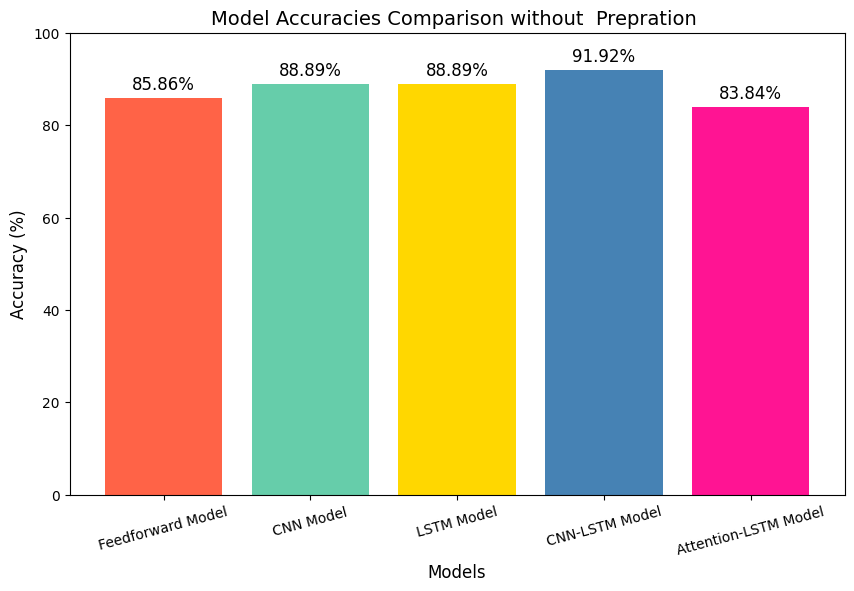

In [ ]:
import matplotlib.pyplot as plt
models = [
    "Feedforward Model",
    "CNN Model",
    "LSTM Model",
    "CNN-LSTM Model",
    "Attention-LSTM Model"
]
accuracies = [
    85.86,  # Feedforward Model Accuracy
    88.89,  # CNN Model Accuracy
    88.89,  # LSTM Model Accuracy
    91.92,  # CNN-LSTM Model Accuracy
    83.84   # Attention-LSTM Model Accuracy
]

colors = ['#FF6347', '#66CDAA', '#FFD700', '#4682B4', '#FF1493']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval}%', ha='center', va='bottom', fontsize=12)

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracies Comparison without  Prepration ", fontsize=14)
plt.ylim(0, 100)

plt.xticks(rotation=15)

plt.show()


In [ ]:

import pandas as pd

print("First 5 entries of the dataset:")
display(df.head())
print("\n" + "#" * 50 + "\n")  # Separator


dependent_variable = 'EventCKD35'

independent_variables = df.columns[df.columns != dependent_variable].tolist()

variables_info = {
    'Variable Name': [dependent_variable] + independent_variables,
    'Definition': [
        'Indicator of whether the patient experienced a CKD event (0 for no, 1 for yes)'  # Dependent variable
    ] + [
        'Gender of the patient (0 for female, 1 for male)',  # Sex
        'Age at the baseline (start of observation)',  # Age-Baseline
        'History of diabetes (0 for no, 1 for yes)',  # History-Diabetes
        'History of coronary heart disease (0 for no, 1 for yes)',  # History-CHD
        'History of vascular disease (0 for no, 1 for yes)',  # History-Vascular
        'Smoking history (0 for non-smoker, 1 for smoker)',  # History-Smoking
        'History of hypertension (0 for no, 1 for yes)',  # History-HTN
        'History of dyslipidemia (0 for no, 1 for yes)',  # History-DLD
        'History of obesity (0 for no, 1 for yes)',  # History-Obesity
        'Use of medications for dyslipidemia (0 for no, 1 for yes)',  # DLD-meds
        'Use of medications for diabetes (0 for no, 1 for yes)',  # DM-meds
        'Use of medications for hypertension (0 for no, 1 for yes)',  # HTNmeds
        'Use of ACE inhibitors or ARBs (0 for no, 1 for yes)',  # ACEIARB
        'Baseline cholesterol level',  # CholesterolBaseline
        'Baseline creatinine level',  # CreatinineBaseline
        'Baseline estimated Glomerular Filtration Rate (eGFR)',  # eGFRBaseline
        'Baseline systolic blood pressure',  # sBPBaseline
        'Baseline diastolic blood pressure',  # dBPBaseline
        'Baseline Body Mass Index (BMI)',  # BMIBaseline
        'Time to event in months',  # TimeToEventMonths
        'Follow-up time in years'  # TIME_YEAR
    ]
}

variables_df = pd.DataFrame(variables_info)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap the DataFrame

print("Variables and Definitions:")
display(variables_df)

print("\nLast 5 entries of the dataset:")
display(df.tail())
print("\n" + "#" * 50 + "\n")  # Separator


First 5 entries of the dataset:


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9



##################################################

Variables and Definitions:


,Variable Name,Definition
0,EventCKD35,Indicator of whether the patient experienced a...
1,Sex,"Gender of the patient (0 for female, 1 for male)"
2,AgeBaseline,Age at the baseline (start of observation)
3,HistoryDiabetes,"History of diabetes (0 for no, 1 for yes)"
4,HistoryCHD,"History of coronary heart disease (0 for no, 1..."
5,HistoryVascular,"History of vascular disease (0 for no, 1 for yes)"
6,HistorySmoking,"Smoking history (0 for non-smoker, 1 for smoker)"
7,HistoryHTN,"History of hypertension (0 for no, 1 for yes)"
8,HistoryDLD,"History of dyslipidemia (0 for no, 1 for yes)"
9,HistoryObesity,"History of obesity (0 for no, 1 for yes)"



Last 5 entries of the dataset:


,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
486,1,25,0,0,0,0,0,0,0,0,0,0,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,0,0,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,1,0,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,0,1,1,4.00,93.0,87.6,119,66,22,35,1,3
490,1,24,0,0,0,0,0,0,0,0,0,0,0,2.23,65.0,129.5,121,55,21,106,0,9



##################################################



In [ ]:




print(f"Shape of the dataset: {df.shape}\n")
print("#" * 50)  # Separator

df.info()
print("\n" + "#" * 50 + "\n")  # Separator


missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
print("\n" + "#" * 50 + "\n")  # Separator





Shape of the dataset: (491, 22)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  491 non-null    int64  
 1   AgeBaseline          491 non-null    int64  
 2   HistoryDiabetes      491 non-null    int64  
 3   HistoryCHD           491 non-null    int64  
 4   HistoryVascular      491 non-null    int64  
 5   HistorySmoking       491 non-null    int64  
 6   HistoryHTN           491 non-null    int64  
 7   HistoryDLD           491 non-null    int64  
 8   HistoryObesity       491 non-null    int64  
 9   DLDmeds              491 non-null    int64  
 10  DMmeds               491 non-null    int64  
 11  HTNmeds              491 non-null    int64  
 12  ACEIARB              491 non-null    int64  
 13  CholesterolBaseline  491 non-null    float64
 14  Creati

In [ ]:

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}\n")
print("#" * 50)  # Separator

value_counts = df.count()
print("Value counts for each column:\n", value_counts)
print("\n" + "#" * 50 + "\n")  # Separator

Number of duplicate entries: 0

##################################################
Value counts for each column:
 Sex                    491
AgeBaseline            491
HistoryDiabetes        491
HistoryCHD             491
HistoryVascular        491
HistorySmoking         491
HistoryHTN             491
HistoryDLD             491
HistoryObesity         491
DLDmeds                491
DMmeds                 491
HTNmeds                491
ACEIARB                491
CholesterolBaseline    491
CreatinineBaseline     491
eGFRBaseline           491
sBPBaseline            491
dBPBaseline            491
BMIBaseline            491
TimeToEventMonths      491
EventCKD35             491
TIME_YEAR              491
dtype: int64

##################################################



In [ ]:


print("Columns in the dataset:\n", df.columns)
print("\n" + "#" *150 + "\n")  # Separator

display(df.describe())
print("\n" + "#" * 150 + "\n")  # Separator


from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['EventCKD35'], df['Sex'])
c, p, dof, expected = chi2_contingency(contigency)
print(p)

Columns in the dataset:
 Index(['Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN ', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB',
       'CholesterolBaseline', 'CreatinineBaseline', 'eGFRBaseline',
       'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths',
       'EventCKD35', 'TIME_YEAR'],
      dtype='object')

######################################################################################################################################################



,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,0.327902,0.617108,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,83.065173,0.114053,6.940937
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,0.469928,0.486588,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,26.011140,0.318200,2.201710
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,0.000000,6.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,0.000000,8.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,0.000000,8.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,111.000000,1.000000,9.000000



######################################################################################################################################################

0.047235810714065074


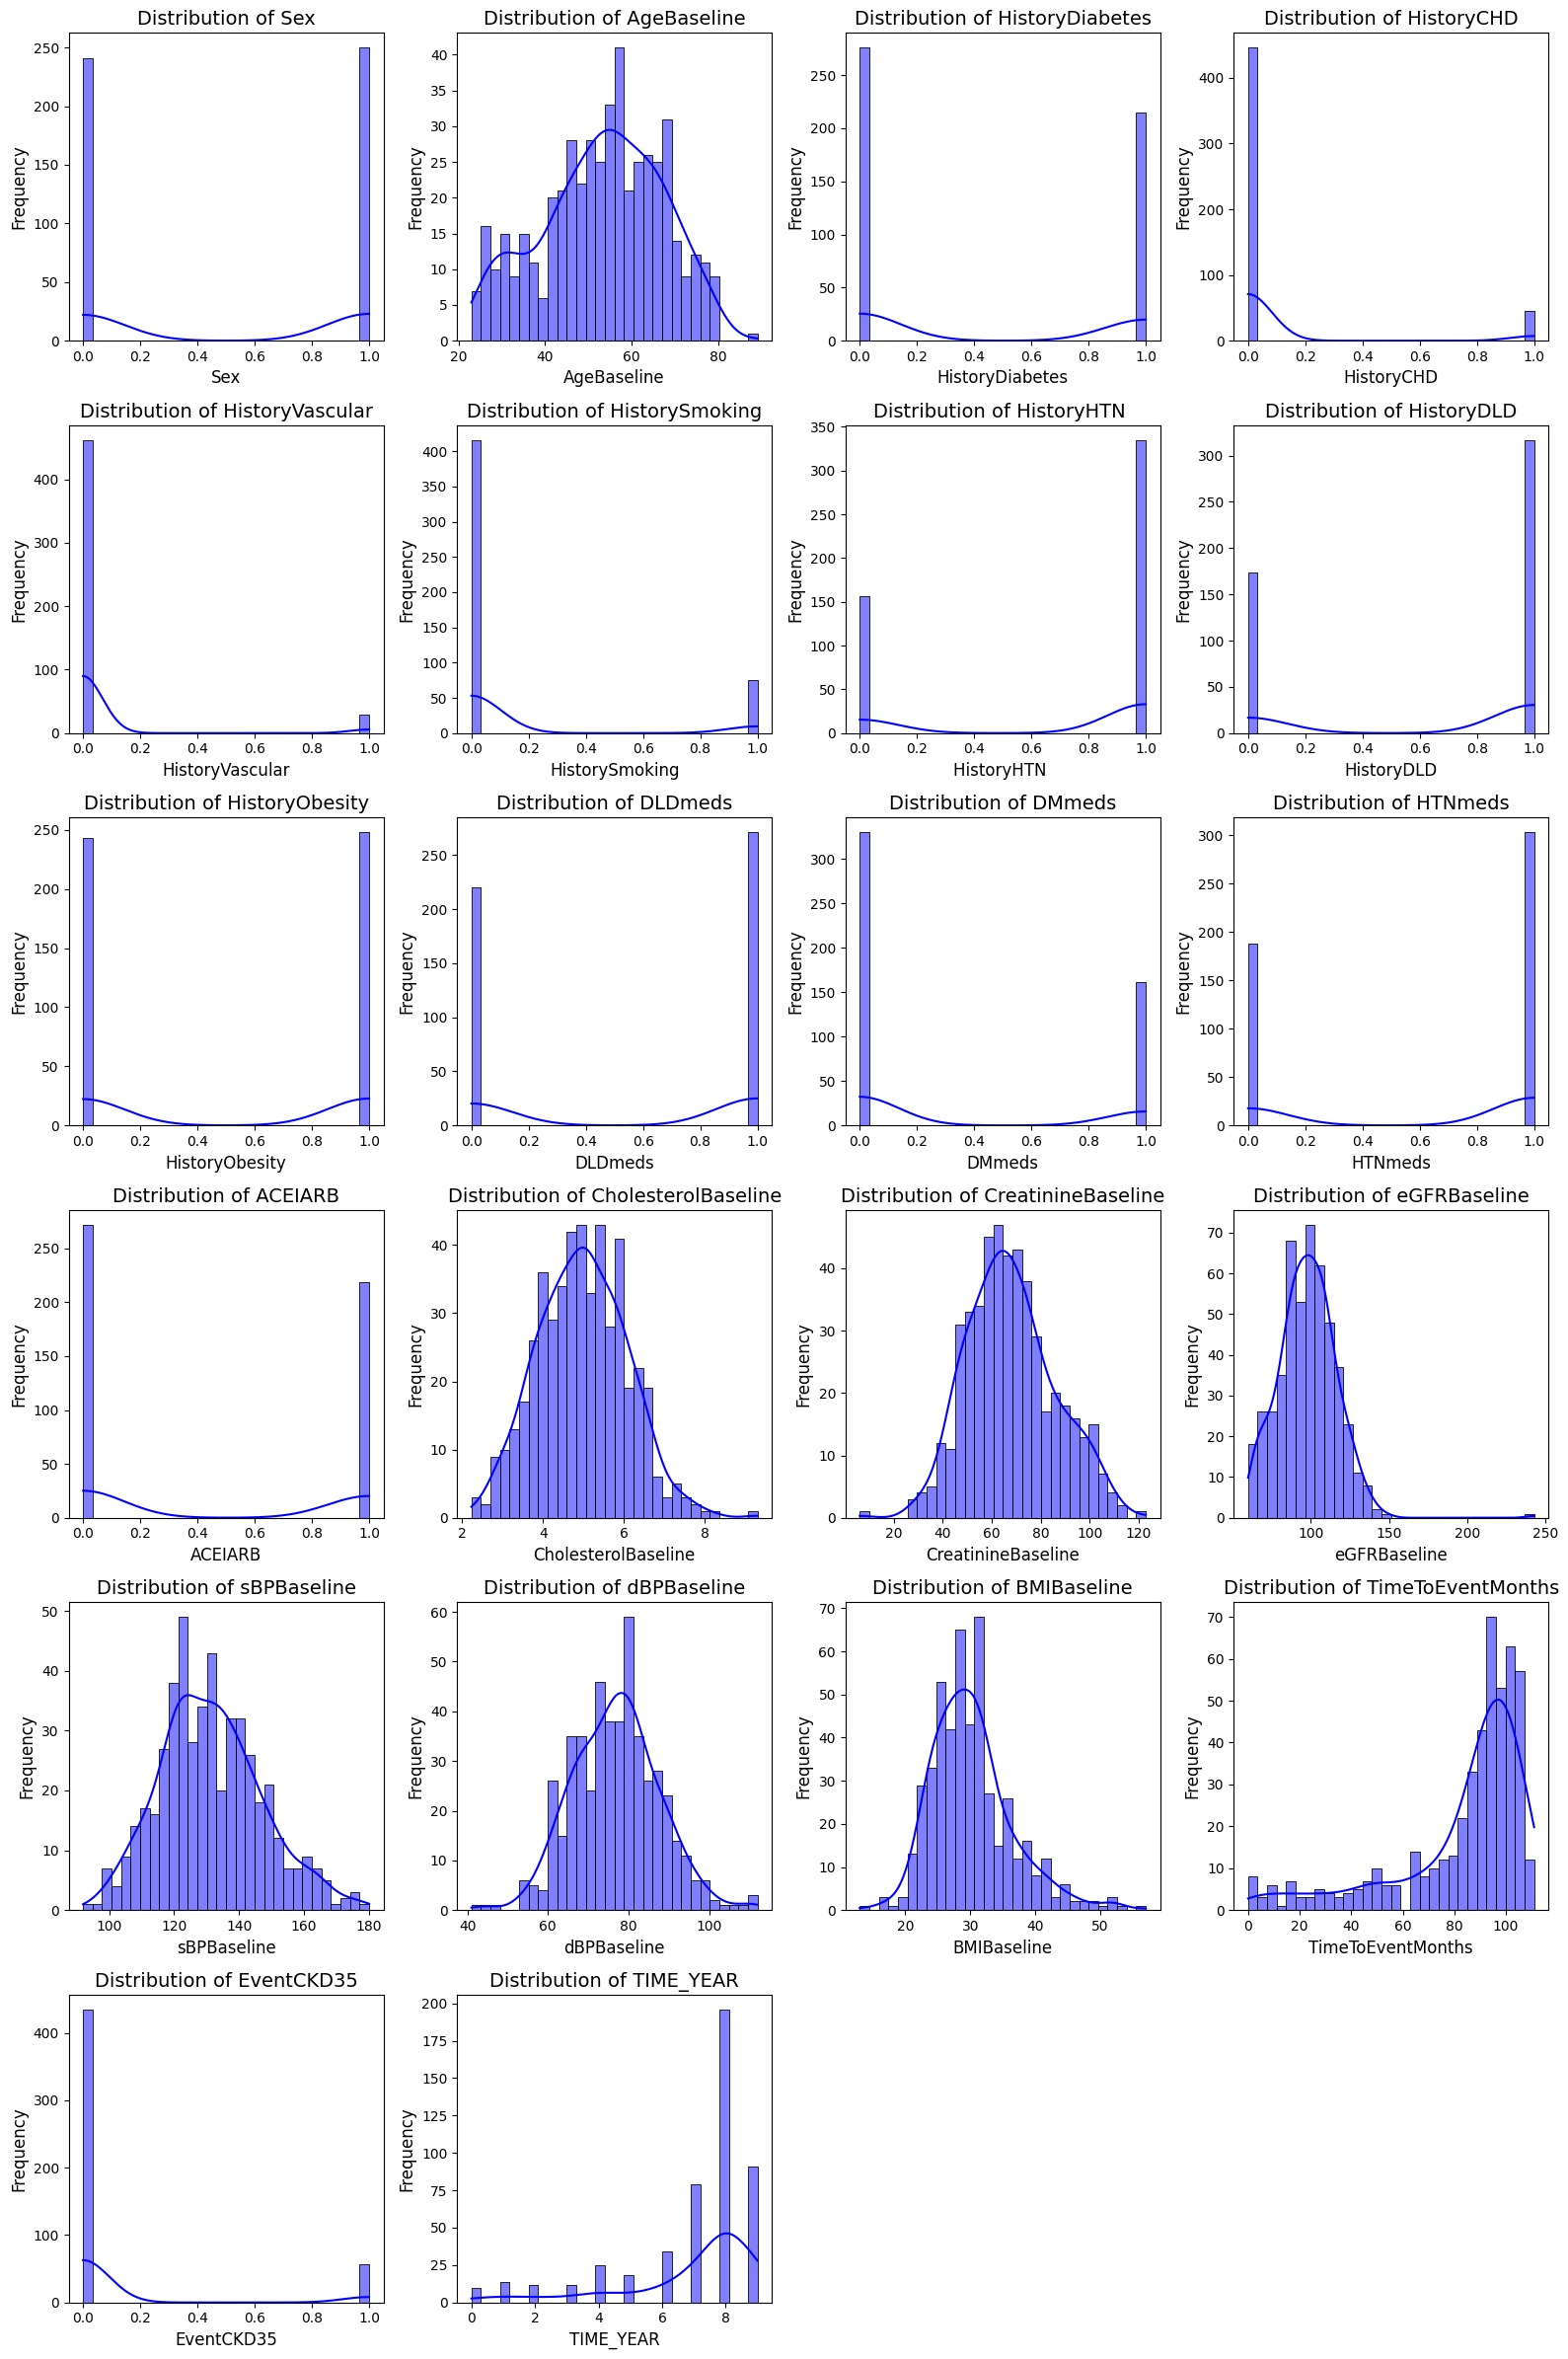

In [ ]:

numerical_columns = df.select_dtypes(include='number').columns


num_columns = 4
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data=df, x=column, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


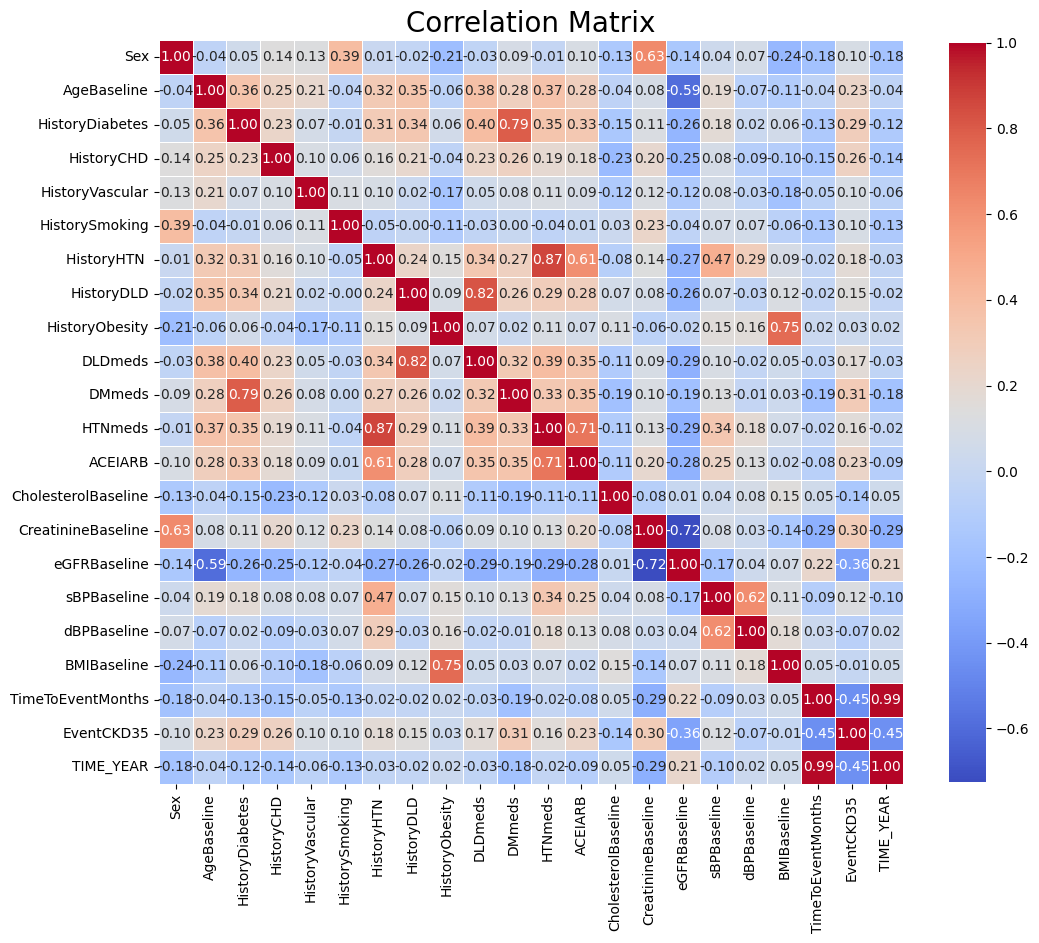

In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()


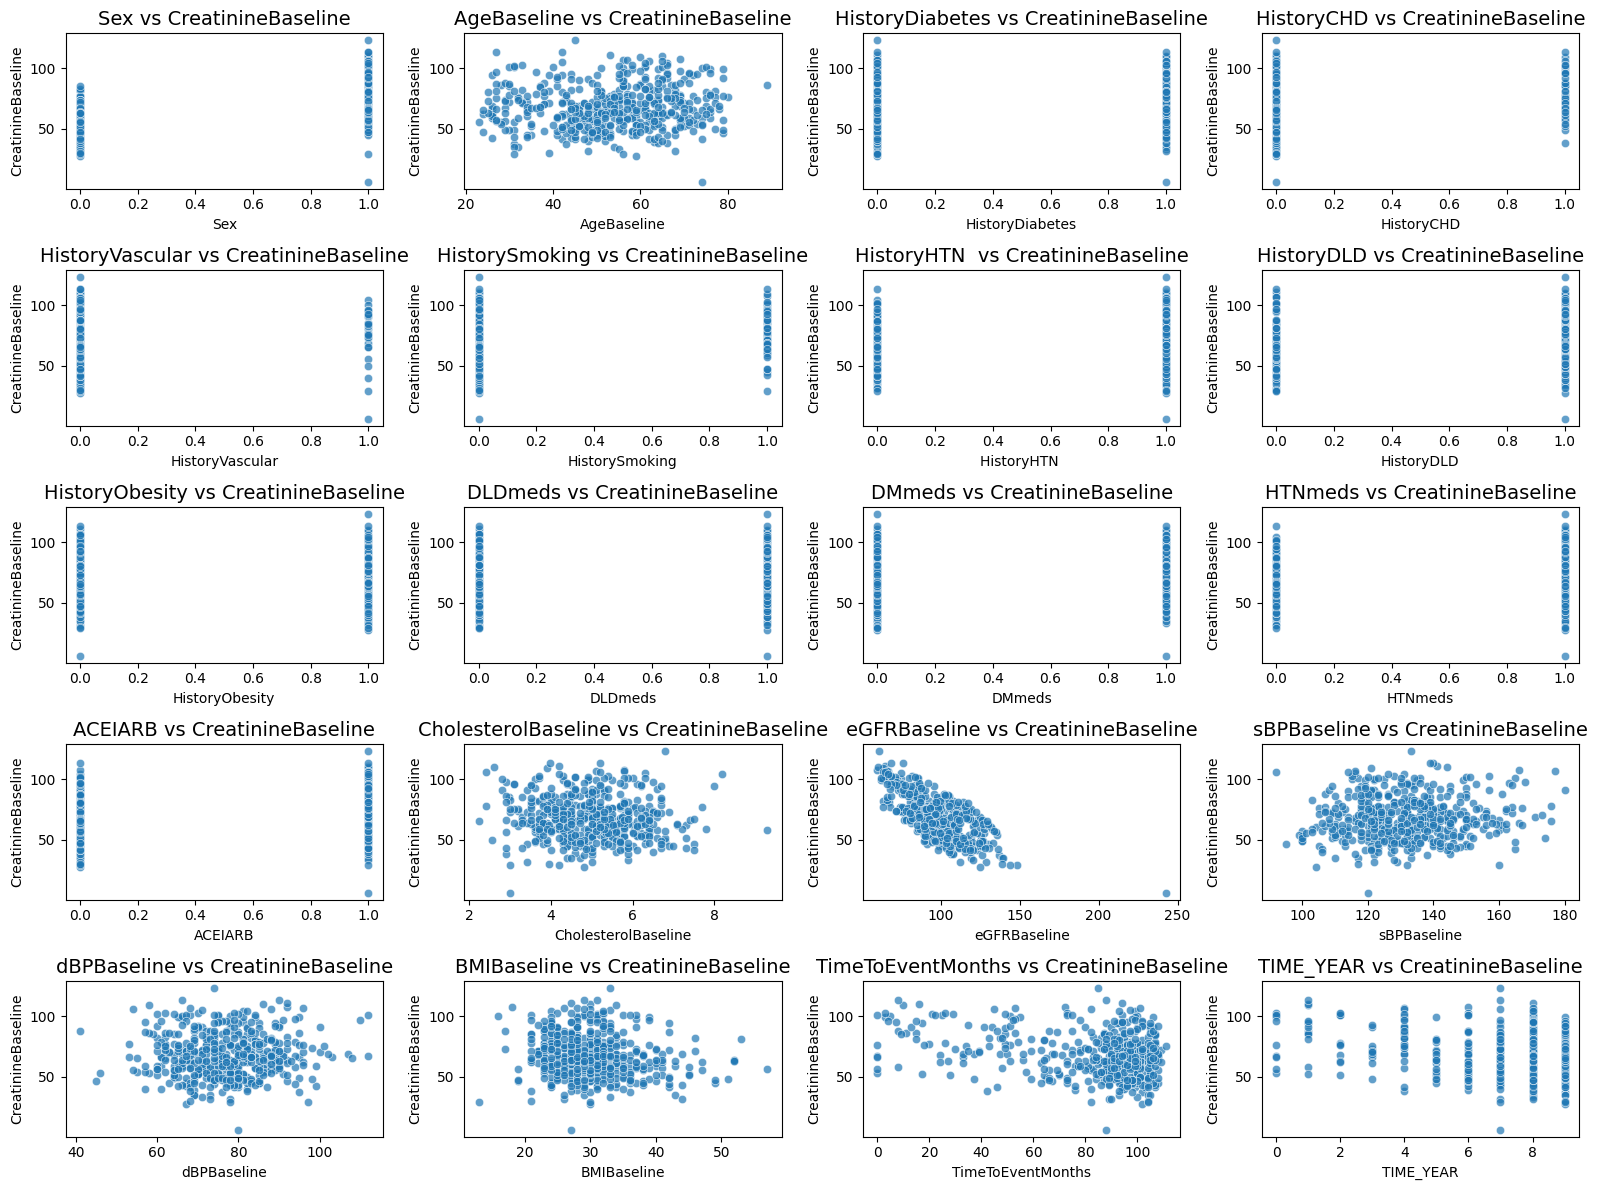

In [ ]:

features_to_plot = [
    'Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
    'HistoryVascular', 'HistorySmoking', 'HistoryHTN ',  # Update this line
    'HistoryDLD', 'HistoryObesity', 'DLDmeds',
    'DMmeds', 'HTNmeds', 'ACEIARB',
    'CholesterolBaseline', 'eGFRBaseline',
    'sBPBaseline', 'dBPBaseline', 'BMIBaseline',
    'TimeToEventMonths', 'TIME_YEAR'
]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    if feature in df.columns:
        plt.subplot(5, 4, i)
        sns.scatterplot(data=df, x=feature, y='CreatinineBaseline', alpha=0.7)
        plt.title(f'{feature} vs CreatinineBaseline', fontsize=14)
    else:
        print(f"Feature '{feature}' not found in DataFrame.")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
<ipython-input-10-89181cddc774>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.reset_index(), x='Importance', y='index', palette='viridis')


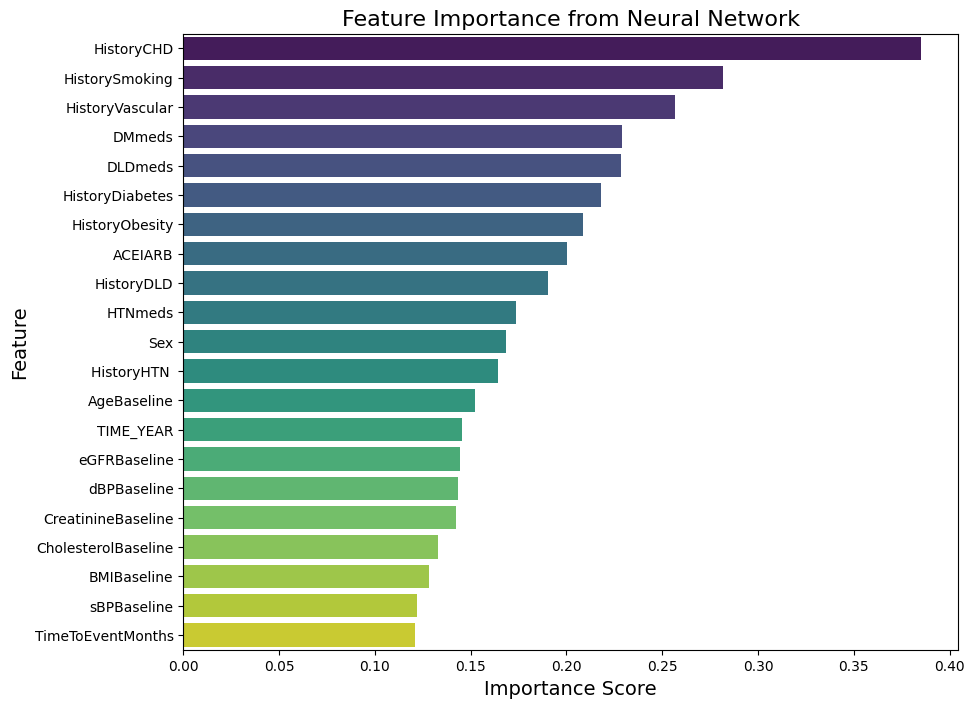

                     Importance
HistoryCHD             0.385229
HistorySmoking         0.281439
HistoryVascular        0.256613
DMmeds                 0.229072
DLDmeds                0.228466
HistoryDiabetes        0.217787
HistoryObesity         0.208618
ACEIARB                0.200062
HistoryDLD             0.190468
HTNmeds                0.173587
Sex                    0.168405
HistoryHTN             0.164029
AgeBaseline            0.152136
TIME_YEAR              0.145281
eGFRBaseline           0.144397
dBPBaseline            0.143330
CreatinineBaseline     0.142213
CholesterolBaseline    0.133159
BMIBaseline            0.128365
sBPBaseline            0.122106
TimeToEventMonths      0.121199
##########################################################################
Remaining Features after Removal:
Index(['Sex', 'AgeBaseline', 'HistoryDiabetes', 'HistoryCHD',
       'HistoryVascular', 'HistorySmoking', 'HistoryHTN ', 'HistoryDLD',
       'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNme

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


X = df.drop(['EventCKD35'], axis=1)  # Drop target column
y = df['EventCKD35']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


feature_importance_model = Sequential()
feature_importance_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
feature_importance_model.add(Dense(32, activation='relu'))
feature_importance_model.add(Dense(1, activation='sigmoid'))

feature_importance_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = feature_importance_model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test), verbose=0)


importance = np.mean(np.abs(feature_importance_model.layers[0].get_weights()[0]), axis=1)  # Calculate average importance for each feature

if importance.shape[0] == X.shape[1]:
    importance_df = pd.DataFrame(importance, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)


    plt.figure(figsize=(10, 8))
    sns.barplot(data=importance_df.reset_index(), x='Importance', y='index', palette='viridis')
    plt.title('Feature Importance from Neural Network', fontsize=16)
    plt.xlabel('Importance Score', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()
else:
    print("Shape mismatch between importance and feature columns.")


print(importance_df)

threshold = 0.1  # Adjust based on your needs
low_importance_features = importance_df[importance_df['Importance'] < threshold].index.tolist()


X_reduced = X.drop(columns=low_importance_features)
print("##########################################################################");

print("Remaining Features after Removal:")
print(X_reduced.columns)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')

# Using 'EventCKD35' as the target variable indicating the presence or absence of kidney disease
data = df.drop(columns='EventCKD35').values  # Dropping the target column from features
labels = df['EventCKD35'].values  # Using the target column for labels

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set number of epochs
epochs = 50

# Feedforward Model
feedforward_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
feedforward_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
feedforward_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
feedforward_accuracy = feedforward_model.evaluate(X_test, y_test)[1] * 100

# CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
cnn_accuracy = cnn_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# LSTM Model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
lstm_accuracy = lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# CNN-LSTM Model
cnn_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
cnn_lstm_accuracy = cnn_lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# Attention-LSTM Model
# Note: A simplified version of Attention
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def call(self, inputs):
        scores = tf.matmul(inputs, inputs, transpose_b=True)
        attention_weights = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(attention_weights, inputs)

attention_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Attention(),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
attention_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
attention_lstm_model.fit(np.expand_dims(X_train, -1), y_train, epochs=epochs, validation_data=(np.expand_dims(X_val, -1), y_val))
attention_lstm_accuracy = attention_lstm_model.evaluate(np.expand_dims(X_test, -1), y_test)[1] * 100

# Print accuracies in percentage
print("Feedforward Model Accuracy: {:.2f}%".format(feedforward_accuracy))
print("CNN Model Accuracy: {:.2f}%".format(cnn_accuracy))
print("LSTM Model Accuracy: {:.2f}%".format(lstm_accuracy))
print("CNN-LSTM Model Accuracy: {:.2f}%".format(cnn_lstm_accuracy))
print("Attention-LSTM Model Accuracy: {:.2f}%".format(attention_lstm_accuracy))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8042 - loss: 1.1649 - val_accuracy: 0.9114 - val_loss: 0.3085
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9066 - loss: 0.3736 - val_accuracy: 0.8987 - val_loss: 0.2502
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8967 - loss: 0.3317 - val_accuracy: 0.8481 - val_loss: 0.3225
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8987 - loss: 0.3079 - val_accuracy: 0.9241 - val_loss: 0.2088
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9220 - loss: 0.2268 - val_accuracy: 0.9241 - val_loss: 0.1783
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9193 - loss: 0.2035 - val_accuracy: 0.9241 - val_loss: 0.2028
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9131 - loss: 0.2084 - val_accuracy: 0.9241 - val_loss: 0.1651
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9164 - loss: 0.2053 - val_accuracy: 0.8861 - val_loss: 0.2243
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8339 - loss: 1.3399 - val_accuracy: 0.9367 - val_loss: 0.1813
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8852 - loss: 0.3441 - val_accuracy: 0.9494 - val_loss: 0.1768
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8910 - loss: 0.2953 - val_accuracy: 0.9367 - val_loss: 0.1652
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8920 - loss: 0.2543 - val_accuracy: 0.9494 - val_loss: 0.1661
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.2375 - val_accuracy: 0.9494 - val_loss: 0.1747
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9046 - loss: 0.2376 - val_accuracy: 0.9620 - val_loss: 0.1844
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9046 - loss: 0.2428 - val_accuracy: 0.9494 - val_loss: 0.1912
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9046 - loss: 0.2479 - val_accuracy: 0.9367 - val_loss: 0.1939
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4261 - loss: 0.7188 - val_accuracy: 0.9367 - val_loss: 0.4039
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8678 - loss: 0.4330 - val_accuracy: 0.9367 - val_loss: 0.2736
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8678 - loss: 0.3802 - val_accuracy: 0.9367 - val_loss: 0.2412
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8678 - loss: 0.3744 - val_accuracy: 0.9367 - val_loss: 0.2385
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8678 - loss: 0.3651 - val_accuracy: 0.9367 - val_loss: 0.2402
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8678 - loss: 0.3557 - val_accuracy: 0.9367 - val_loss: 0.2361
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8678 - loss: 0.3454 - val_accuracy: 0.9367 - val_loss: 0.2281
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8678 - loss: 0.3351 - val_accuracy: 0.9367 - val_loss: 0.

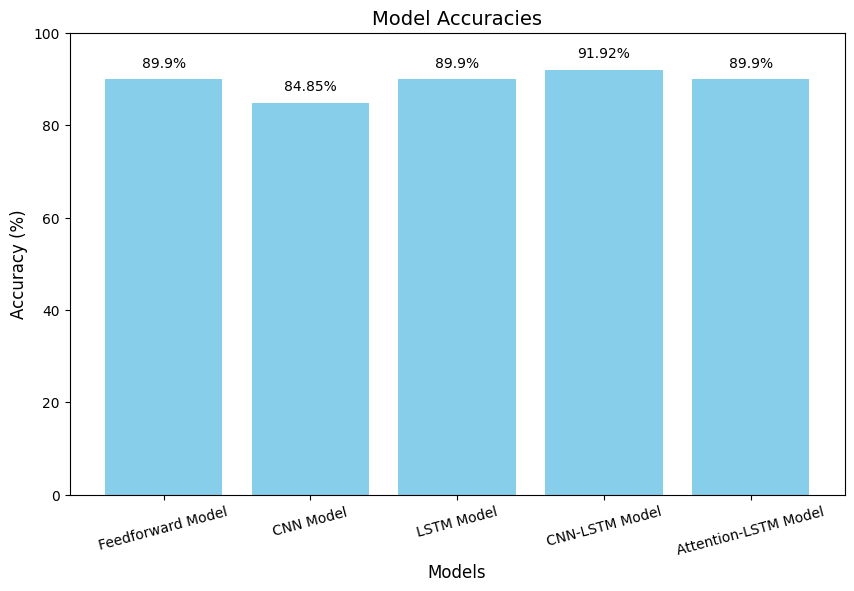

In [ ]:
import matplotlib.pyplot as plt

models = [
    "Feedforward Model",
    "CNN Model",
    "LSTM Model",
    "CNN-LSTM Model",
    "Attention-LSTM Model"
]
accuracies = [
    89.90,  # Feedforward Model Accuracy
    84.85,  # CNN Model Accuracy
    89.90,  # LSTM Model Accuracy
    91.92,  # CNN-LSTM Model Accuracy
    89.90   # Attention-LSTM Model Accuracy
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracies", fontsize=14)
plt.ylim(0, 100)  # Set the Y-axis range to 0-100
plt.xticks(rotation=15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval}%', ha='center', va='bottom', fontsize=10)

plt.show()


Original class distribution:
EventCKD35
0    435
1     56
Name: count, dtype: int64

Balanced class distribution after SMOTE:
EventCKD35
0    347
1    347
Name: count, dtype: int64

Class weights: {0: 1.0, 1: 1.0}


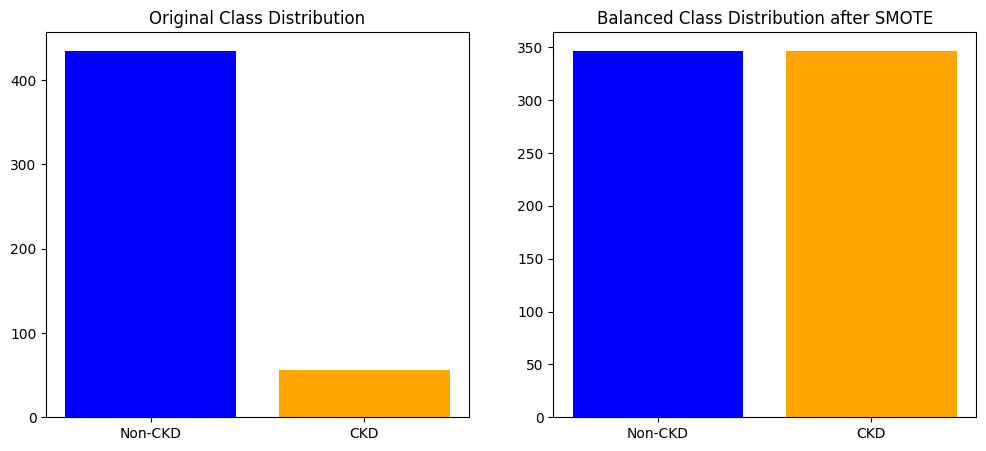

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


X = df.drop(['EventCKD35'], axis=1)  # Drop target column
y = df['EventCKD35']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original class distribution:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"\nClass weights: {class_weights_dict}")


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(y.value_counts().index, y.value_counts().values, color=['blue', 'orange'])
ax[0].set_title('Original Class Distribution')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Non-CKD', 'CKD'])

ax[1].bar(pd.Series(y_resampled).value_counts().index, pd.Series(y_resampled).value_counts().values, color=['blue', 'orange'])
ax[1].set_title('Balanced Class Distribution after SMOTE')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non-CKD', 'CKD'])

plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




Original class distribution:
EventCKD35
0    435
1     56
Name: count, dtype: int64

Balanced class distribution after ADASYN and SMOTE:
EventCKD35
0    435
1    435
Name: count, dtype: int64

Class weights: {0: 1.0, 1: 1.0}


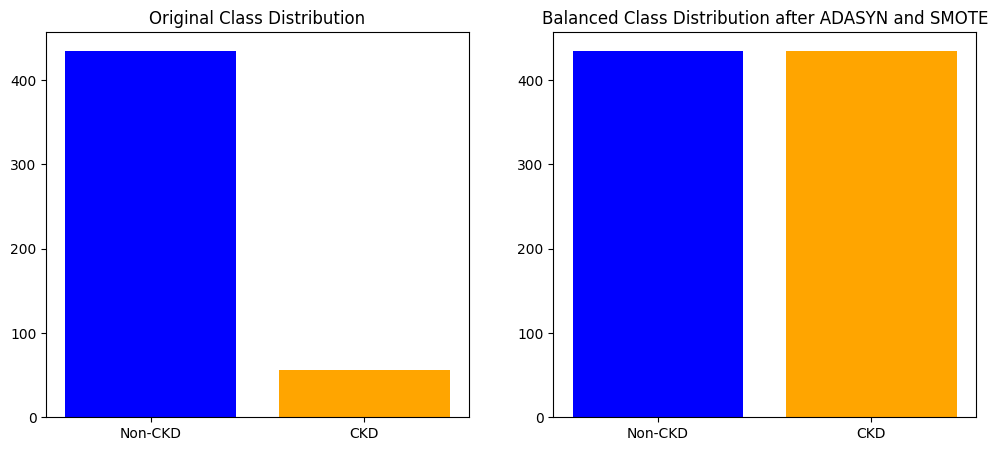


Difference between original and resampled class distributions:
   Class  Original Count  Balanced Count
0      0             435             435
1      1              56             435


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y_series = pd.Series(y)

print("Original class distribution:")
print(y_series.value_counts())

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_adasyn, y_adasyn)

print("\nBalanced class distribution after ADASYN and SMOTE:")
print(pd.Series(y_resampled).value_counts())


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"\nClass weights: {class_weights_dict}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(y_series.value_counts().index, y_series.value_counts().values, color=['blue', 'orange'])
ax[0].set_title('Original Class Distribution')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Non-CKD', 'CKD'])

ax[1].bar(pd.Series(y_resampled).value_counts().index, pd.Series(y_resampled).value_counts().values, color=['blue', 'orange'])
ax[1].set_title('Balanced Class Distribution after ADASYN and SMOTE')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non-CKD', 'CKD'])

plt.show()

original_class_dist = pd.DataFrame(y_series.value_counts()).reset_index()
original_class_dist.columns = ['Class', 'Original Count']

balanced_class_dist = pd.DataFrame(pd.Series(y_resampled).value_counts()).reset_index()
balanced_class_dist.columns = ['Class', 'Balanced Count']


class_diff_df = pd.merge(original_class_dist, balanced_class_dist, on='Class', how='outer')

class_diff_df.fillna(0, inplace=True)

print("\nDifference between original and resampled class distributions:")
print(class_diff_df)



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np
import pandas as pd


X = df.drop(['EventCKD35'], axis=1)  # Features
y = df['EventCKD35'].values  # Target variable as a NumPy array

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, verbose=0)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)

print(f"Simple Feedforward Neural Network Accuracy: {accuracy * 100:.2f}%")


Simple Feedforward Neural Network Accuracy: 91.95%


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np

X = df.drop(['EventCKD35'], axis=1).values  # Features as a NumPy array
y = df['EventCKD35'].values  # Target variable as a NumPy array

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))  # Reshape for Conv1D


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

model2 = Sequential()
model2.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.5))  # Dropout layer for regularization
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model2.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, verbose=0)

loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)

print(f"CNN Model Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Accuracy: 94.25%


In [ ]:

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')

X = df.drop(['EventCKD35'], axis=1).values  # Replace 'EventCKD35' with your actual target column if different
y = df['EventCKD35'].values  # Replace 'EventCKD35' with your actual target column if different

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1], 1)))  # Use Input layer for shape specification
model3.add(LSTM(50, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))


model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, verbose=0)


loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")


LSTM Model Accuracy: 91.95%


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, TimeDistributed

X = df.drop(['EventCKD35'], axis=1).values
y = df['EventCKD35'].values

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_resampled.shape[1], 1)))

model.add(MaxPooling1D(pool_size=1))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(128, activation='relu', return_sequences=False))


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=500, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, verbose=0)

_, accuracy = model.evaluate(X_resampled, y_resampled, verbose=0)

print(f"CNN - LSTM Accuracy : {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN - LSTM Accuracy : 99.89%


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Concatenate, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

lstm_out = LSTM(64, return_sequences=True)(input_layer)
lstm_out, state_h, state_c = LSTM(64, return_sequences=True, return_state=True)(lstm_out)

# Attention mechanism
attention = Attention()([lstm_out, lstm_out])

# Flatten the output and feed to Dense layers
flattened = Flatten()(attention)
dense_out = Dense(32, activation='relu')(flattened)
dense_out = Dropout(0.5)(dense_out)
output_layer = Dense(1, activation='sigmoid')(dense_out)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)

print(f"Attention-LSTM Model Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Attention-LSTM Model Accuracy: 94.95%


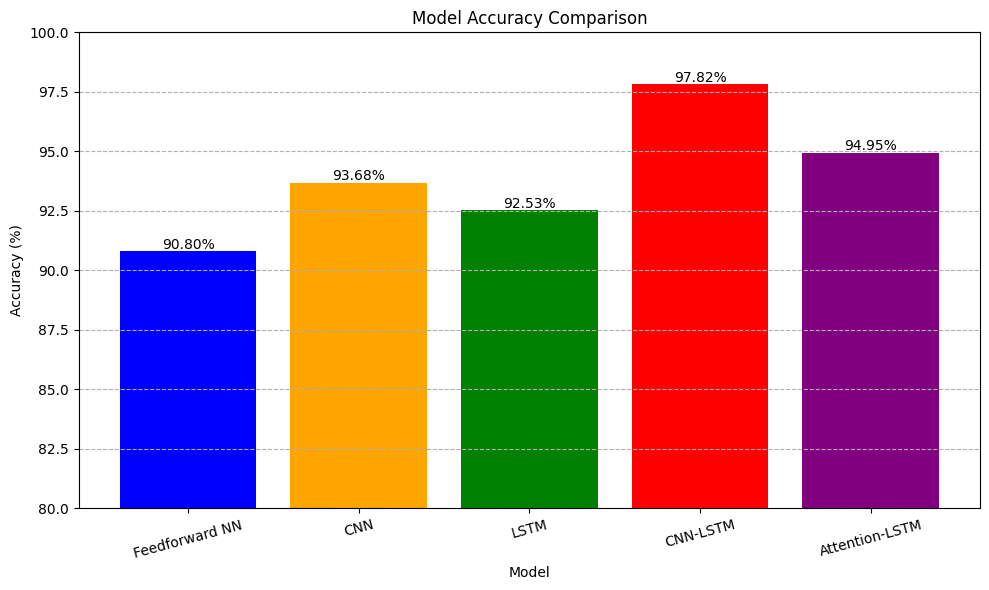

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['Feedforward NN', 'CNN', 'LSTM', 'CNN-LSTM', 'Attention-LSTM']

# Assign the accuracies of each model (replace with your actual accuracy values)
accuracy_feedforward = 90.80
accuracy_cnn =   93.68
accuracy_lstm = 92.53
accuracy_cnn_lstm = 97.82

accuracy_attention_lstm = 94.95

# Collect accuracies into a list
accuracies = [accuracy_feedforward, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_attention_lstm]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(80, 100)  # Set y-axis limits from 80 to 100 for better visualization
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')

# Display accuracy as percentage on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.1, f'{acc:.2f}%', ha='center')

plt.tight_layout()
plt.show()


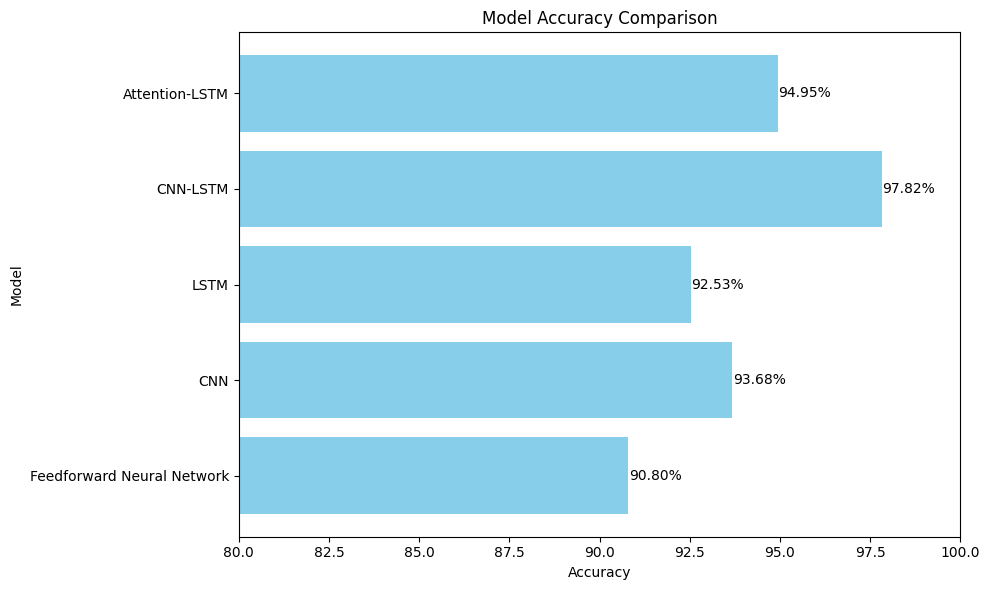

In [ ]:
import matplotlib.pyplot as plt
accuracy_feedforward = 90.80
accuracy_cnn =   93.68
accuracy_lstm = 92.53
accuracy_cnn_lstm = 97.82
accuracy_attention_lstm = 94.95



# Model names and accuracies
model_names = ['Feedforward Neural Network', 'CNN', 'LSTM', 'CNN-LSTM', 'Attention-LSTM']
accuracies = [accuracy_feedforward, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_attention_lstm]

# Horizontal bar chart representation
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlim(80, 100)  # Set x-axis limits from 0 to 1
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Display accuracy as percentage on the bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f'{acc :.2f}%', va='center')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
Precision: 0.75
Recall: 0.82
F1 Score: 0.78
AUC-ROC: 0.97


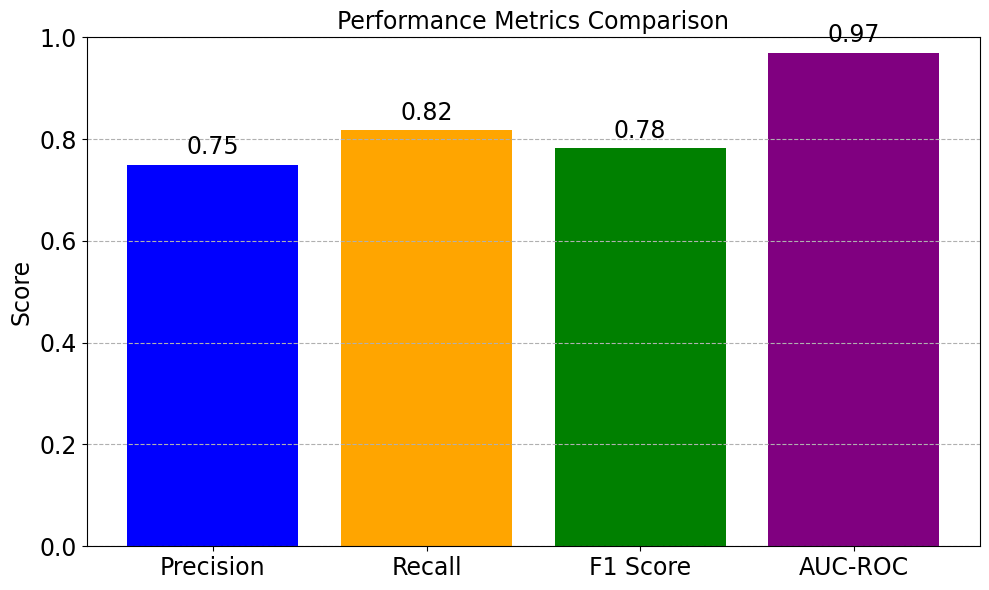

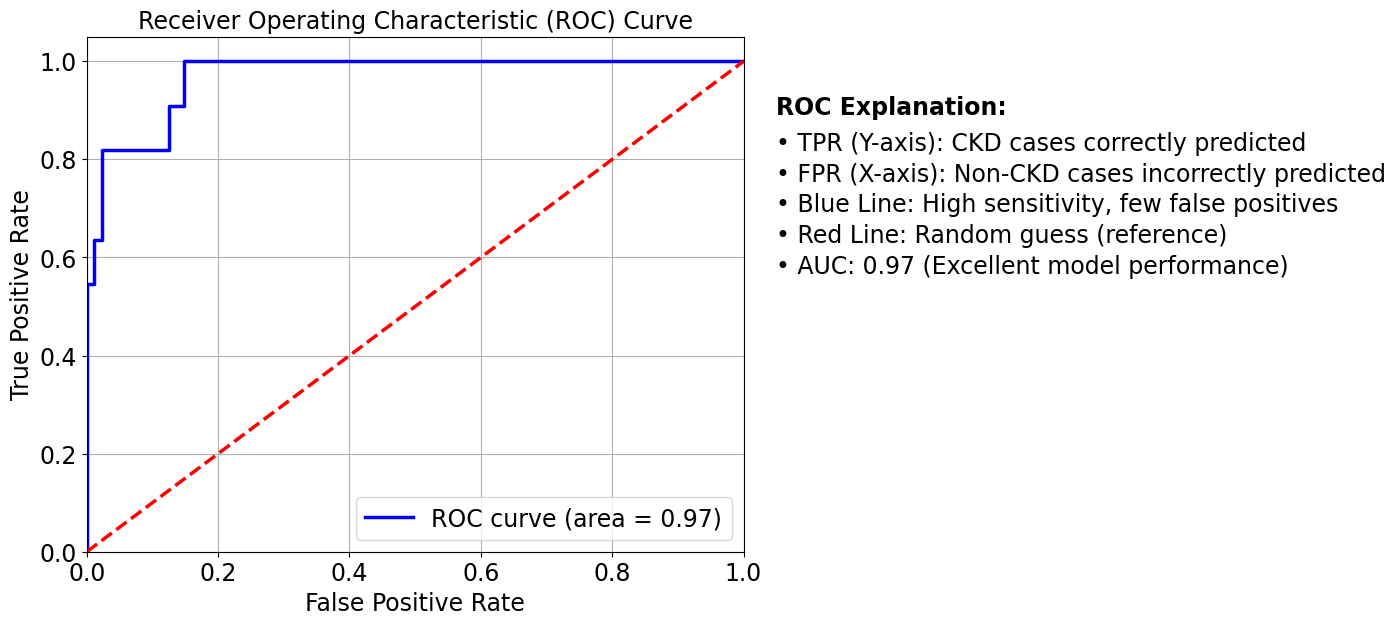

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your preprocessed data is already defined as X and y

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Reshape the data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the Attention-LSTM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
lstm_out, state_h, state_c = LSTM(64, return_sequences=True, return_state=True)(lstm_out)
attention = Attention()([lstm_out, lstm_out])
flattened = Flatten()(attention)
dense_out = Dense(32, activation='relu')(flattened)
dense_out = Dropout(0.5)(dense_out)
output_layer = Dense(1, activation='sigmoid')(dense_out)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate performance metrics
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']
auc_roc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Visualization of metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC-ROC']
values = [precision, recall, f1_score, auc_roc]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.title('Performance Metrics Comparison', fontsize=17)
plt.ylabel('Score', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid(axis='y', linestyle='--')

# Display score on top of the bars
for i, val in enumerate(values):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=17)

plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(16, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_roc, linewidth=2.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.grid()

# Add text explanation on the right side of the plot with proper gaps
plt.text(1.05, 0.85, "ROC Explanation:", fontsize=17, fontweight='bold', color='black', transform=plt.gca().transAxes)
plt.text(1.05, 0.78, "• TPR (Y-axis): CKD cases correctly predicted", fontsize=17, color='black', transform=plt.gca().transAxes)
plt.text(1.05, 0.72, "• FPR (X-axis): Non-CKD cases incorrectly predicted", fontsize=17, color='black', transform=plt.gca().transAxes)
plt.text(1.05, 0.66, "• Blue Line: High sensitivity, few false positives", fontsize=17, color='black', transform=plt.gca().transAxes)
plt.text(1.05, 0.60, "• Red Line: Random guess (reference)", fontsize=17, color='black', transform=plt.gca().transAxes)
plt.text(1.05, 0.54, "• AUC: %0.2f (Excellent model performance)" % auc_roc, fontsize=17, color='black', transform=plt.gca().transAxes)

plt.tight_layout(pad=7)  # Adjust padding to provide proper space
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


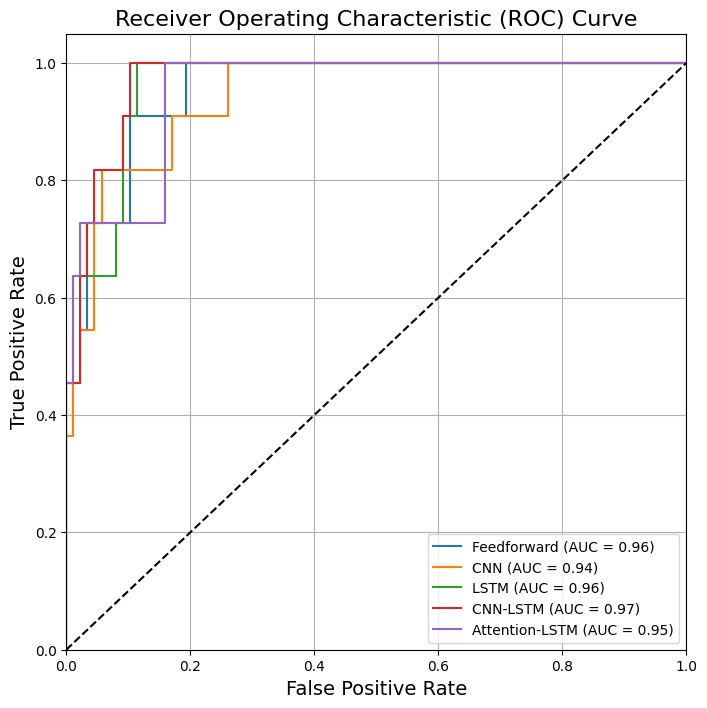

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Flatten, Conv1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your preprocessed data is already defined as X and y

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Reshape the data for LSTM input
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define models
def create_feedforward_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_cnn_lstm_model():
    input_layer = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    lstm_out = LSTM(64, return_sequences=True)(input_layer)
    lstm_out = LSTM(64)(lstm_out)
    lstm_out = Dropout(0.5)(lstm_out)
    output_layer = Dense(1, activation='sigmoid')(lstm_out)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def create_attention_lstm_model():
    input_layer = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    lstm_out = LSTM(64, return_sequences=True)(input_layer)
    attention = Attention()([lstm_out, lstm_out])
    flattened = Flatten()(attention)
    dense_out = Dense(32, activation='relu')(flattened)
    dense_out = Dropout(0.5)(dense_out)
    output_layer = Dense(1, activation='sigmoid')(dense_out)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Dictionary of models
models = {
    'Feedforward': create_feedforward_model(),
    'CNN': create_cnn_model(),
    'LSTM': create_lstm_model(),
    'CNN-LSTM': create_cnn_lstm_model(),
    'Attention-LSTM': create_attention_lstm_model()
}

# Training and ROC Curve plotting
plt.figure(figsize=(8, 8))
for model_name, model in models.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_lstm if model_name in ['LSTM', 'CNN-LSTM', 'Attention-LSTM'] else X_train_cnn,
              y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Get predicted probabilities
    y_prob = model.predict(X_test_lstm if model_name in ['LSTM', 'CNN-LSTM', 'Attention-LSTM'] else X_test_cnn)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')

# Final touches to the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()


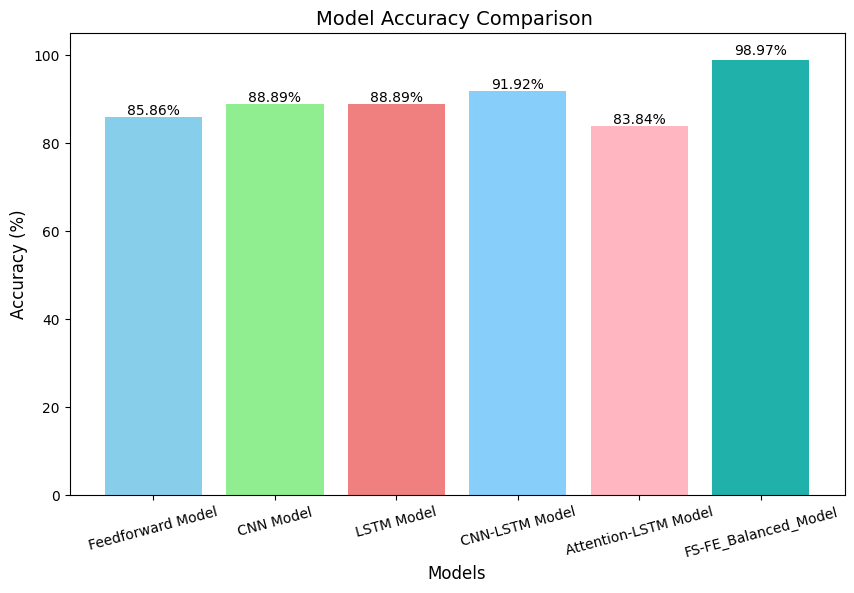

In [ ]:
import matplotlib.pyplot as plt

# Accuracy of the 5 models without preprocessing steps (in percentage)
feedforward_accuracy = 85.86
cnn_accuracy = 88.89
lstm_accuracy = 88.89
cnn_lstm_accuracy = 91.92
attention_lstm_accuracy = 83.84

# Accuracy of the best model with preprocessing steps (in percentage)
best_model_accuracy = 98.97  # Replace with the actual accuracy you get from the final model with preprocessing

# List of model names
models = [
    "Feedforward Model",
    "CNN Model",
    "LSTM Model",
    "CNN-LSTM Model",
    "Attention-LSTM Model",
    "FS-FE_Balanced_Model"
]

# List of accuracies
accuracies = [
    feedforward_accuracy,
    cnn_accuracy,
    lstm_accuracy,
    cnn_lstm_accuracy,
    attention_lstm_accuracy,
    best_model_accuracy
]

# Plot the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightseagreen'])

# Add accuracy labels on top of the bars
for i, bar in enumerate(bars):
    if i == len(bars) - 1:
        # For the last bar, position the label a bit higher to avoid overlap
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}%',
                 ha='center', fontsize=10, color='black')
    else:
        # For the other bars, position the label normally
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%',
                 ha='center', fontsize=10, color='black')

# Adjust the y-axis limit to ensure all bars are within the plot
plt.ylim(0, 105)  # Increase the y-axis limit slightly to fit the last bar's label

# Set labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison ", fontsize=14)

# Display the plot
plt.xticks(rotation=15)
plt.show()


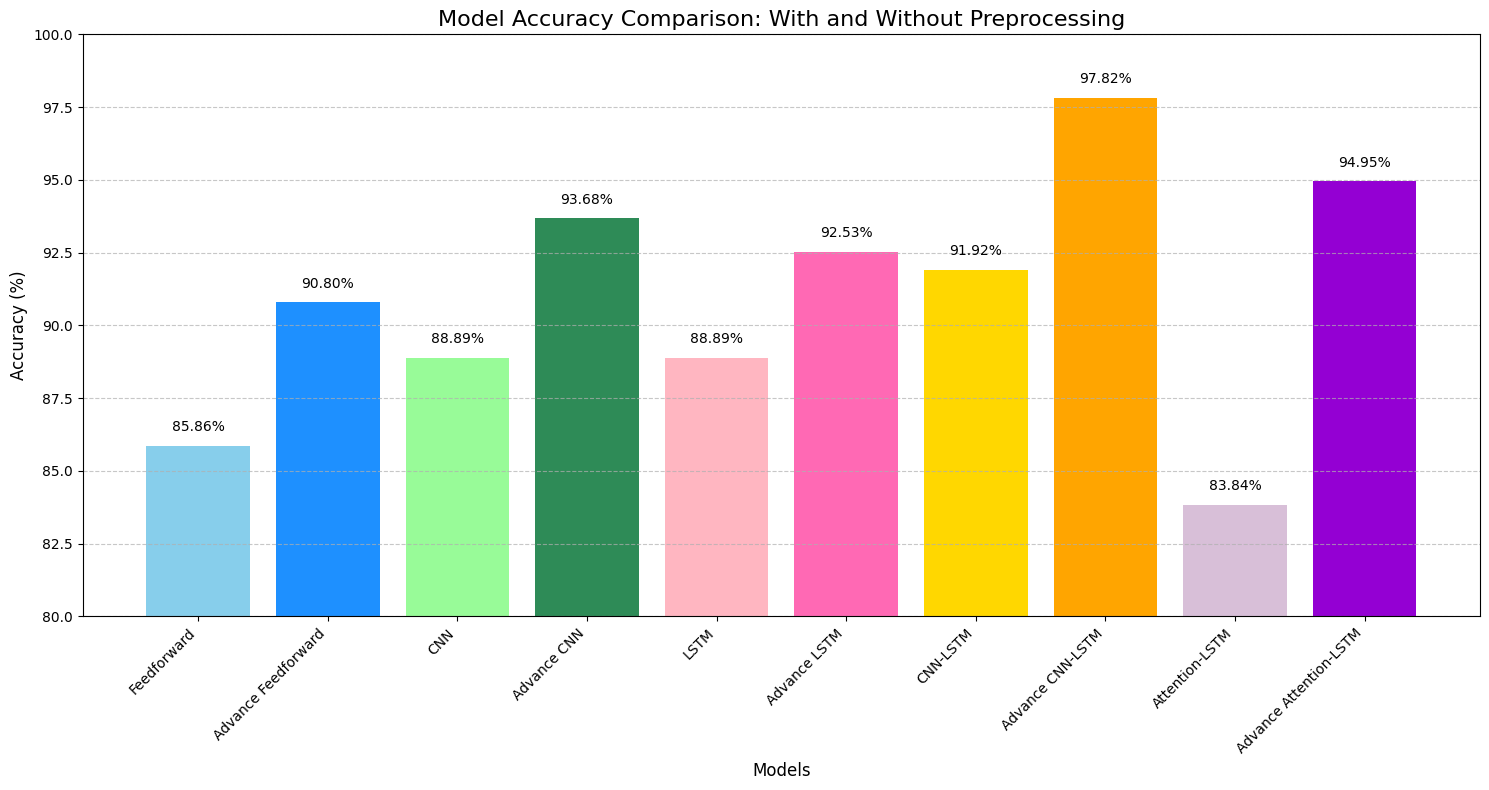

In [ ]:
import matplotlib.pyplot as plt

# Define model names for side-by-side comparison
model_names = [
    'Feedforward', 'Advance Feedforward',
    'CNN', 'Advance CNN',
    'LSTM', 'Advance LSTM',
    'CNN-LSTM', 'Advance CNN-LSTM',
    'Attention-LSTM', 'Advance Attention-LSTM'
]

# Define accuracies for each model, matching the order of model names
accuracies = [
    85.86, 90.80,   # Feedforward
    88.89, 93.68,   # CNN
    88.89, 92.53,   # LSTM
    91.92, 97.82,   # CNN-LSTM
    83.84, 94.95    # Attention-LSTM
]

# Set color palette for clear distinction between no preprocessing and with preprocessing
colors = ['#87CEEB', '#1E90FF',   # Feedforward
          '#98FB98', '#2E8B57',   # CNN
          '#FFB6C1', '#FF69B4',   # LSTM
          '#FFD700', '#FFA500',   # CNN-LSTM
          '#D8BFD8', '#9400D3']   # Attention-LSTM

# Create the bar plot
plt.figure(figsize=(15, 8))
bars = plt.bar(model_names, accuracies, color=colors)

# Add accuracy labels on top of each bar, with a small offset for consistent appearance
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height():.2f}%',
             ha='center', fontsize=10, color='black')

# Set a tighter y-axis limit for reduced visual exaggeration of differences
plt.ylim(80, 100)  # Narrow range to minimize the height difference effect

# Add labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison: With and Without Preprocessing", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


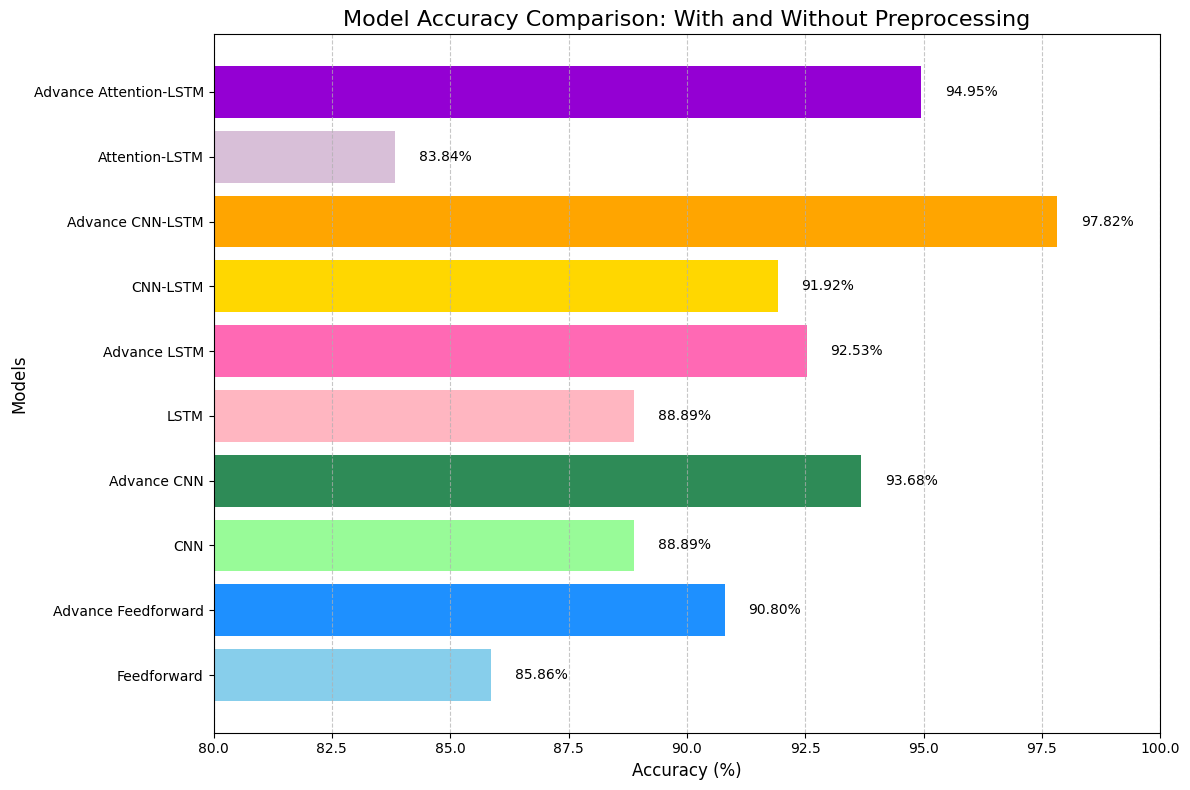

In [ ]:
import matplotlib.pyplot as plt

# Define model names for side-by-side comparison
model_names = [
    'Feedforward', 'Advance Feedforward',
    'CNN', 'Advance CNN',
    'LSTM', 'Advance LSTM',
    'CNN-LSTM', 'Advance CNN-LSTM',
    'Attention-LSTM', 'Advance Attention-LSTM'
]

# Define accuracies for each model, matching the order of model names
accuracies = [
    85.86, 90.80,   # Feedforward
    88.89, 93.68,   # CNN
    88.89, 92.53,   # LSTM
    91.92, 97.82,   # CNN-LSTM
    83.84, 94.95    # Attention-LSTM
]

# Set color palette for clear distinction between no preprocessing and with preprocessing
colors = ['#87CEEB', '#1E90FF',   # Feedforward
          '#98FB98', '#2E8B57',   # CNN
          '#FFB6C1', '#FF69B4',   # LSTM
          '#FFD700', '#FFA500',   # CNN-LSTM
          '#D8BFD8', '#9400D3']   # Attention-LSTM

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(model_names, accuracies, color=colors)

# Add accuracy labels to the right of each bar, with a small offset for consistent appearance
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', fontsize=10, color='black')

# Set a tighter x-axis limit for reduced visual exaggeration of differences
plt.xlim(80, 100)  # Narrow range to minimize the height difference effect

# Add labels and title
plt.ylabel("Models", fontsize=12)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison: With and Without Preprocessing", fontsize=16)

# Add a grid for easier readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Confusion Matrix for Feedforward Neural Network:
 [[85  2]
 [ 0 87]]


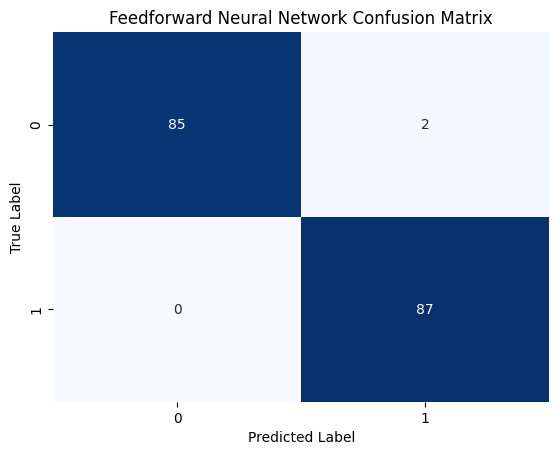

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Confusion Matrix for CNN:
 [[83  4]
 [ 3 84]]


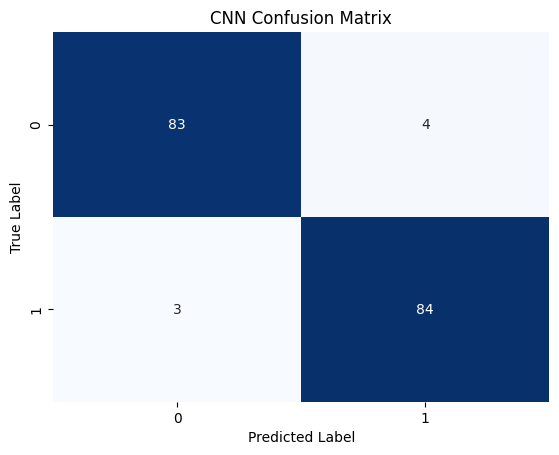

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

Confusion Matrix for LSTM:
 [[84  3]
 [ 0 87]]


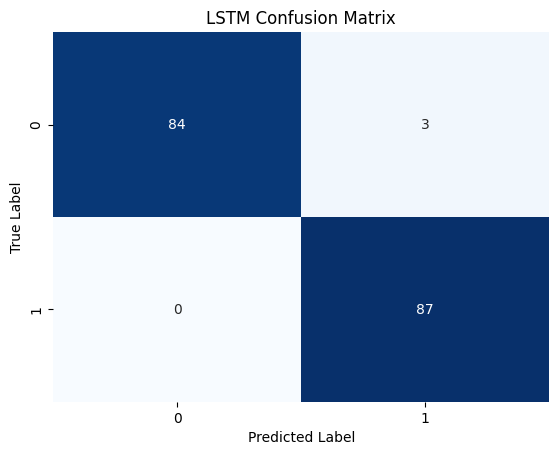


Model: Feedforward Neural Network
Precision: 0.98
Recall: 1.00
F1 Score: 0.99
AUC-ROC: 0.99

Model: CNN
Precision: 0.95
Recall: 0.97
F1 Score: 0.96
AUC-ROC: 0.98

Model: LSTM
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
AUC-ROC: 0.99


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/ChronicKidneyDisease_EHRs_from_AbuDhabi.csv')
X = df.drop(['EventCKD35'], axis=1).values  # Features
y = df['EventCKD35'].values  # Target

# Apply SMOTE for balanced classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Class weights for handling imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Reshape data for sequential models
X_train_seq = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Reshape for LSTM & CNN
X_test_seq = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize dictionary to store model performances
performance_metrics = {}

# Define and train each model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, verbose=0)
    y_prob = model.predict(X_test)
    y_pred = (y_prob > 0.5).astype("int32")

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    auc_roc = roc_auc_score(y_test, y_prob)

    # Store metrics
    performance_metrics[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'AUC-ROC': auc_roc
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return model

# Feedforward Neural Network
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
evaluate_model(model1, X_train, y_train, X_test, y_test, 'Feedforward Neural Network')

# CNN Model
model2 = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])), # 1D Conv Layer
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
evaluate_model(model2, X_train_seq, y_train, X_test_seq, y_test, 'CNN')

# LSTM Model
model3 = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
evaluate_model(model3, X_train_seq, y_train, X_test_seq, y_test, 'LSTM')

# Print all performance metrics
for model_name, metrics in performance_metrics.items():
    print(f"\nModel: {model_name}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.2f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


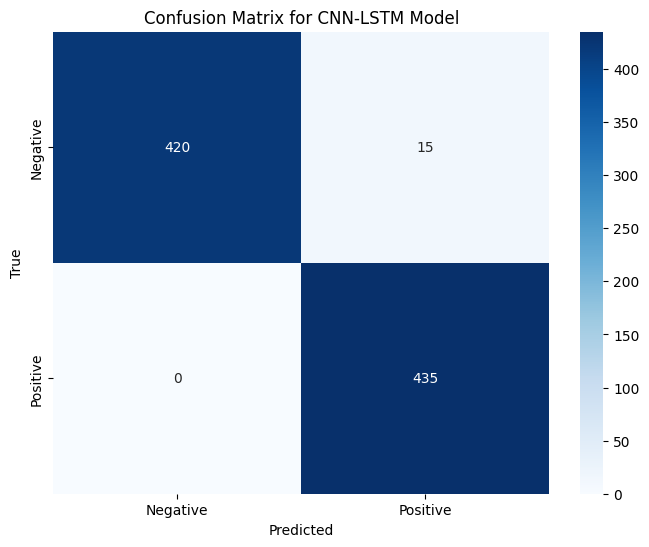

Confusion Matrix:
[[420  15]
 [  0 435]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
y_pred = model.predict(X_resampled)  # Predicting on the resampled data
y_pred_class = (y_pred > 0.5).astype(int)  # Converting probabilities to binary class labels

# Generate the confusion matrix
cm = confusion_matrix(y_resampled, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN-LSTM Model')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape X_test to match the model's expected input shape
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Generate predictions for the test set
y_pred = model.predict(X_test_reshaped)  # Make predictions
y_pred_class = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Attention-LSTM Model')
plt.show()


InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of output must be a multiple of the number of groups: 64 vs 21

Stack trace for op definition: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-37-b5c423f1cfde>", line 5, in <cell line: 5>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/conv1d.py", line 151, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 909, in conv
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 254, in conv
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 244, in _conv_xla
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 231, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_682018[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[sequential_39_1/conv1d_27_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_682329]